In [1]:
import pandas as pd

with open('animals_data.csv', 'r', encoding='euc-kr', errors='replace') as f:
    animals_data = pd.read_csv(f, low_memory=False)

with open('shelters_data.csv', 'r', encoding='utf-8-sig', errors='replace') as f:
    shelters_data = pd.read_csv(f, low_memory=False)

print(animals_data.head(2))
print(shelters_data.head(2))

   desertion_no shelter_name animal_name  species       age  \
0  4.485670e+14     창원동물보호센터  000114 (M)      114  2020(년생)   
1  4.485670e+14     창원동물보호센터  000114 (F)      114  2024(년생)   

                                           image_url personality  \
0  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   
1  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   

                             story notice_date sex process_state Unnamed: 11  \
0  검정색목줄착용.얼굴이 하운드계열 처럼 생겼음.잘 생 김.  2025-07-31   M           보호중         NaN   
1               내장칩 있어요~보호자분과 연락중~  2025-07-31   F        종료(반환)         NaN   

  Unnamed: 12 Unnamed: 13 Unnamed: 14  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
  shelter_name region  count  long_term  adopted  species  \
0    (사)대구수의사회    NaN      0        NaN      NaN      NaN   
1  (사)동물보호관리협회  부산광역시     88        0.0      8.0    114.0   

                                           image_url   care_

In [2]:
animals_data['notice_date'] = pd.to_datetime(animals_data['notice_date'])

In [3]:
df = animals_data.merge(
    shelters_data[['shelter_name', 'region']], 
    on='shelter_name',
    how='left'
)

In [4]:
daily_region = (
    df.groupby(['notice_date', 'region'])
      .size()
      .reset_index(name='count')
)

print(daily_region.head(10))

  notice_date region  count
0  2020-02-16   경상북도     43
1  2020-03-29   경상북도     43
2  2020-06-18   경상북도     43
3  2021-01-24   경상북도     43
4  2021-02-15   경상북도     43
5  2021-03-19   경상북도     43
6  2021-03-27   경상북도     43
7  2021-04-15   경상북도     43
8  2021-04-30   경상남도     43
9  2021-06-15   경상북도     43


In [5]:
pivot_df = daily_region.pivot(
    index='notice_date',
    columns='region',
    values='count'
).fillna(0)

print(pivot_df.head())

region       강원도  강원특별자치도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
notice_date                                                                     
2020-02-16   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2020-03-29   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2020-06-18   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-01-24   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-02-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   

region       세종특별자치시  울산광역시  인천광역시  전라남도  전라북도  전북특별자치도  제주특별자치도  충청남도  충청북도  
notice_date                                                                   
2020-02-16       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2020-03-29       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2020-06-18       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2021-01-24       0.0    0.0    0.0   

In [6]:
pivot_features = pivot_df.copy()

# 전날 데이터
lag1 = pivot_df.shift(1).add_suffix('_lag1')

# 7일 전 데이터
lag7 = pivot_df.shift(7).add_suffix('_lag7')

# 합치기
pivot_features = pd.concat([pivot_features, lag1, lag7], axis=1)

In [7]:
rolling7 = pivot_df.rolling(7).mean().add_suffix('_rolling7')
pivot_features = pd.concat([pivot_features, rolling7], axis=1)

In [8]:
pivot_features['weekday'] = pivot_features.index.weekday
pivot_features['is_weekend'] = pivot_features['weekday'].isin([5,6]).astype(int)

In [9]:
pivot_features = pivot_features.dropna()
print(pivot_features.head(10))

region       강원도  강원특별자치도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
notice_date                                                                     
2021-04-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-04-30   0.0      0.0  0.0  43.0   0.0    0.0    0.0    0.0    0.0    0.0   
2021-06-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-08-19   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-09-23   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-10-12   0.0      0.0  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
2021-10-20   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-11-03   0.0      0.0  0.0  43.0   0.0    0.0    0.0    0.0    0.0    0.0   
2021-11-24   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-12-15   0.0      0.0  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   

region       ...  울산광역시_rol

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Feature 스케일링 (pivot_features를 사용)
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(pivot_features)

# Target: 전체 유기동물 수 합계
target = pivot_df.sum(axis=1)
target = target.loc[pivot_features.index]  # feature index와 맞추기

target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target.values.reshape(-1,1))

# X, y 생성 (30일 윈도우)
time_steps = 30
X, y = [], []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i+time_steps])
    y.append(scaled_target[i+time_steps])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape, "y shape:", y.shape)

X shape: (1288, 30, 78) y shape: (1288, 1)


In [11]:
split = int(len(X) * 0.9)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

print(X_train.shape, X_val.shape)

(1159, 30, 78) (129, 30, 78)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# 콜백 추가
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0747 - val_loss: 0.0278 - learning_rate: 5.0000e-04
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - val_loss: 0.0234 - learning_rate: 5.0000e-04
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0371 - val_loss: 0.0208 - learning_rate: 5.0000e-04
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0291 - val_loss: 0.0185 - learning_rate: 5.0000e-04
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0283 - val_loss: 0.0182 - learning_rate: 5.0000e-04
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0274 - val_loss: 0.0174 - learning_rate: 5.0000e-04
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0258 - val_loss: 0.0222 - learning_rate: 5.0000e-04
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0262 - val_loss: 0.0209 - learning_rate: 5.0000e-04
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0254 - val_loss: 0.0185 - 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


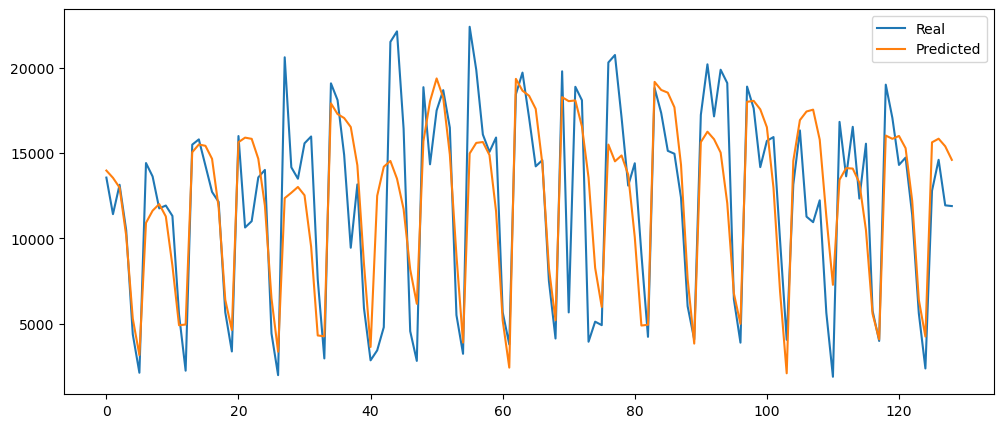

RMSE: 3495.2054297865907


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_scaled = model.predict(X_val)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)

# 예측 결과 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(y_val_real, label='Real')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_val_real, y_pred))
print("RMSE:", rmse)